# Pandas & Matplotlib

## Pandas for KMC

In [3]:
import pandas as pd

file = '../Simulation_forster_singlet_.txt'

data = pd.read_csv(file,delim_whitespace=True)
data

,Time,DeltaX,DeltaY,DeltaZ,Type,Energy,Location,FinalX,FinalY,FinalZ,CausaMortis
0,1.328325e+02,4.95,0.00,0.0,singlet,6.1,1.0,44.74,44.84,0.43,fluor
1,END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8.754684e+02,10.58,0.00,0.0,singlet,6.1,0.0,15.06,15.16,0.43,fluor
3,END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6.468289e+02,-4.09,10.99,0.0,singlet,6.1,0.0,21.16,40.69,0.43,fluor
...,...,...,...,...,...,...,...,...,...,...,...
19995,END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19996,3.853406e+04,25.37,-5.49,0.0,singlet,6.1,0.0,25.25,19.17,0.43,fluor
19997,END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19998,5.820242e+04,14.40,-8.76,0.0,singlet,6.1,1.0,44.74,10.41,0.43,fluor


In [4]:
#Removendo os ENDs
# Easy peazy
data = data[data.Time != 'END']
data

,Time,DeltaX,DeltaY,DeltaZ,Type,Energy,Location,FinalX,FinalY,FinalZ,CausaMortis
0,1.328325e+02,4.95,0.00,0.0,singlet,6.1,1.0,44.74,44.84,0.43,fluor
2,8.754684e+02,10.58,0.00,0.0,singlet,6.1,0.0,15.06,15.16,0.43,fluor
4,6.468289e+02,-4.09,10.99,0.0,singlet,6.1,0.0,21.16,40.69,0.43,fluor
6,1.688720e+03,35.34,-45.71,0.0,singlet,6.1,1.0,35.22,-0.88,0.43,fluor
8,5.690656e+03,-30.45,-4.01,0.0,singlet,6.1,1.0,-0.12,15.16,0.43,fluor
...,...,...,...,...,...,...,...,...,...,...,...
19990,1.110556e+04,44.85,-10.53,0.0,singlet,6.1,1.0,44.74,19.17,0.43,fluor
19992,1.935994e+04,-8.89,-10.38,0.0,singlet,6.1,0.0,-0.12,4.78,0.43,fluor
19994,2.436541e+04,-20.77,0.00,0.0,singlet,6.1,0.0,4.49,15.16,0.43,fluor
19996,3.853406e+04,25.37,-5.49,0.0,singlet,6.1,0.0,25.25,19.17,0.43,fluor


In [5]:
# Calculando tempo de vid
import numpy as np

mortos = data[(data.CausaMortis == 'fluor') | (data.CausaMortis == 'phosph') | (data.CausaMortis == 'nonrad')]

#Transforma em array
lifetime = mortos['Time'].to_numpy(float)

print('Avg lifetime is:', np.mean(lifetime), 'ps')

Avg lifetime is: 9937.2967462241 ps


In [6]:
# Calculando Ld

dx = mortos['DeltaX'].to_numpy(float)
dy = mortos['DeltaY'].to_numpy(float)
dz = mortos['DeltaZ'].to_numpy(float)

Ld = np.sqrt(np.mean(dx**2 + dy**2 + dz**2))

print('Ld is:', Ld, 'AA')

Ld is: 27.2112517642978 AA


In [7]:
#TRPL 

fluor = data[data.CausaMortis == 'fluor']
fluor = fluor['Time'].to_numpy(float)
hist, bins = np.histogram(fluor, bins=40)

print(hist, len(hist))
print(bins, len(bins))

#Note que hist e bins tem lens diferentes. Vamos pegar a meiota dos bins
bins = bins[:-1] + (bins[1:] - bins[:-1])/2

print(bins)

[1953 1539 1175 1015  857  686  533  451  342  261  253  181  150  120
   94   73   66   45   39   29   33   29   16   13    8    4    4    8
    3    1    5    2    3    1    0    2    3    2    0    1] 40
[3.98290600e+00 2.12940108e+03 4.25481926e+03 6.38023744e+03
 8.50565562e+03 1.06310738e+04 1.27564920e+04 1.48819101e+04
 1.70073283e+04 1.91327465e+04 2.12581647e+04 2.33835829e+04
 2.55090010e+04 2.76344192e+04 2.97598374e+04 3.18852556e+04
 3.40106737e+04 3.61360919e+04 3.82615101e+04 4.03869283e+04
 4.25123465e+04 4.46377646e+04 4.67631828e+04 4.88886010e+04
 5.10140192e+04 5.31394373e+04 5.52648555e+04 5.73902737e+04
 5.95156919e+04 6.16411100e+04 6.37665282e+04 6.58919464e+04
 6.80173646e+04 7.01427828e+04 7.22682009e+04 7.43936191e+04
 7.65190373e+04 7.86444555e+04 8.07698736e+04 8.28952918e+04
 8.50207100e+04] 41
[ 1066.69199467  3192.11017202  5317.52834937  7442.94652672
  9568.36470408 11693.78288142 13819.20105877 15944.61923612
 18070.03741348 20195.45559083 22320.8737

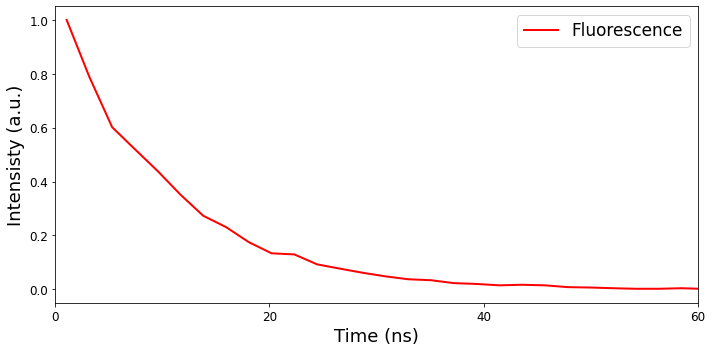

In [8]:
# Fazendo o gráfico

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))


ax.plot(bins/1000,hist/max(hist), lw=2, color='red', label='Fluorescence') #lw dá a largura da linha
ax.set_xlabel('Time (ns)', size=18)   
ax.set_ylabel('Intensisty (a.u.)', size=18)
ax.set_xlim([0,60]) #restringe valores do eixo
ax.set_xticks([0,20,40,60]) #restringe os ticks
ax.set_yticks([0,0.2,0.4,0.6,0.8,1.0]) #restringe os ticks
ax.tick_params(axis='both', which='major', labelsize=12) #Mexe no tamanho dos ticks

plt.legend(loc='best',fontsize=17)
plt.tight_layout() # sempre bom usar



C:\Users\ledso\AppData\Local\Temp/ipykernel_7096/3693709817.py:11: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax[1,1].plot(x,y,'.',marker=r'$S_1$', markersize=12)


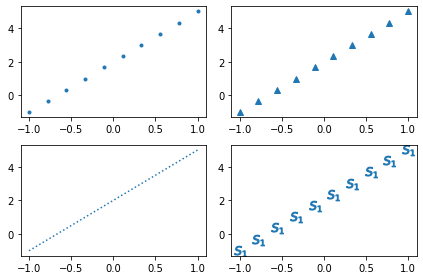

In [13]:
# Pra fazer um painel

x = np.linspace(-1,1,10)
y = 3*x + 2
#painel 2x2
fig, ax = plt.subplots(2,2)

ax[0,0].plot(x,y,'.')
ax[0,1].plot(x,y,'^')
ax[1,0].plot(x,y,':')
ax[1,1].plot(x,y,'.',marker=r'$S_1$', markersize=12)

plt.tight_layout()


[[1.716800e+00 2.389180e-11 2.389179e-11]
 [1.722745e+00 4.621851e-11 4.621846e-11]
 [1.728690e+00 8.485458e-11 8.485442e-11]
 [1.734636e+00 1.478520e-10 1.478515e-10]
 [1.740581e+00 2.444962e-10 2.444945e-10]]


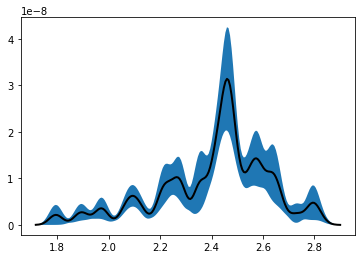

In [20]:
# Plotando um espectro

#Pegando os dados com um comando
data = np.loadtxt('../fluor_1c')

#printando a 5 primeiras linhas e todas as colunas
print(data[:5,:])

#Separando x, y e erro:
#coluna 0
x = data[:,0]
#coluna 1
y = data[:,1]
#coluna 2
z = data[:,2]


fig, ax = plt.subplots()

ax.plot(x,y,color='black', lw=2)
ax.fill_between(x,y-z,y+z)

